Finding least squares approximation for V band
Alpha value: -2 Beta value: -2.3 Gamma value: 0.0
Minimized Sum of Squares: 411.73354047476596
Finding least squares approximation for J band
Alpha value: -3 Beta value: -2.7 Gamma value: 0.0
Minimized Sum of Squares: 386.173822305443
Finding least squares approximation for H band
Alpha value: -3 Beta value: -3.0 Gamma value: 0.0
Minimized Sum of Squares: 377.6068019502726
Finding least squares approximation for K band
Alpha value: -3 Beta value: -3.1 Gamma value: 0.0
Minimized Sum of Squares: 373.6717715112623


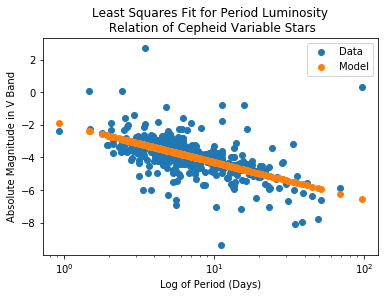

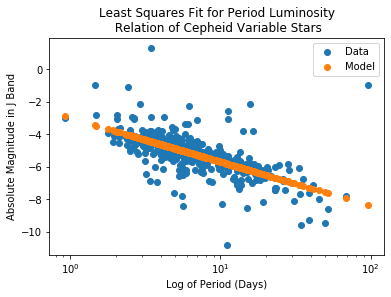

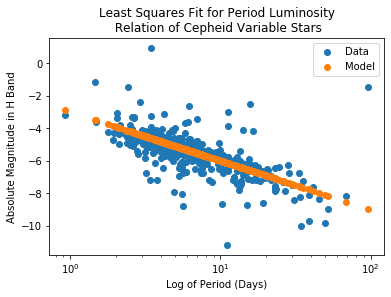

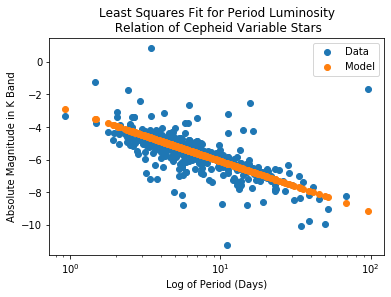

In [3]:
'''
ASTP-720, Fall 2020
Homework 6
Zach Diermyer
Problem 1 & 2
'''

import numpy as np
import matplotlib.pyplot as plt

def SumSquares(data, model):
    '''
    Finds the sum of squares of the residuals from the model subtracted data
    Inputs:
        data - Array of data period and absolute magnitude values
        model - Array of model period and absolute magnitude values
    Returns:
        S - The sum of squares
    '''
    if len(data) != len(model):
        raise ValueError('Model and Data Arrays are not Equal Length')
    S = 0
    for i in range(len(data)):
        r = data[i][1] - model[i][1]
        S += r**2
    return(S)

def CreateModel(data, AbsMags):
    '''
    Searches a range of alpha, beta, and gamma values to find the smallest sum of squares or
    best fit to the data
    Inputs:
        data - 2D array of data of all data point parameters
        AbsMags - Array of data absolute magnitude values
    Returns:
        best_fit - Array of model absolute magnitude values for best fit
        best_alpha - Best fit alpha value
        best_beta - Best fit beta value
        best_gamma - Best fit gamma value
        Smin - Minimum sum of squares found
    '''
    best_fit = []
    best_alpha = 0
    best_beta = 0
    best_gamma = 0
    Smin = 1000
    for i in range(-20, 20):
        alpha = i
        for j in range(-50, 50):
            beta = j/10
            for k in range(-50, 50):
                gamma = k/10
                M_model = []
                for el in range(len(data)):
                    M = alpha + beta * np.log10(data[el][0]) + gamma * data[el][7]   #Model equation
                    M_model.append([data[el][0], M])
                S = SumSquares(data = AbsMags, model = M_model)
                if S < Smin:    #Check if current model sum of squares is less then minimum sum of squares
                    best_fit = M_model
                    best_alpha = alpha
                    best_beta = beta
                    best_gamma = gamma
                    Smin = S
    return(best_fit, best_alpha, best_beta, best_gamma, Smin)

def FindAbsMag(m, d, E, Band):
    '''
    Finds the absolute magnitude of the input data point using the distance modulus
    Inputs:
        m - Apparent magnitude value of star/data point
        d - Distance to star/data point
        E - Color excess (B-V) of star/data point
        Band - String, desired band to find absolute magnitude of
    Returns:
        M - Absolute magnitude
    '''
    Rv = 3.1  #Dimensionless Av/E Ratio
    Av = Rv * E
    if Band == 'V':   #Alamb/Av values taken from table 21.1 of Draine
        Alamb = Av
    elif Band == 'J':
        Alamb = Av * 0.271
    elif Band == 'H':
        Alamb = Av * 0.175
    elif Band == 'K':
        Alamb = Av * 0.117
    else:
        raise NameError('Band not Found')
    M = m - 5 * np.log10(d) + 5 - Alamb   #Distance modulus formula
    return(M)

def main():
    data = open('cepheid_data.txt', 'r')
    data_arr = []
    while True:
        line = data.readline()
        if not line:
            break               #Exit if line is empty
        splitline = line.split()
        if splitline[0][0] == '#':
            pass
        else:
            T = float(splitline[2][0:-1])   #Period in days
            D = float(splitline[3][0:-1])   #Distance in kpc
            V = float(splitline[4][0:-1])   #V-Band Magnitude
            J = float(splitline[5][0:-1])   #J-Band Magnitude
            H = float(splitline[6][0:-1])   #H-Band Magnitude
            K = float(splitline[7][0:-1])   #K-Band Magnitude
            E = float(splitline[8][0:-1])   #Color Excess
            Z = float(splitline[9])   #Metalicity [Fe/H]
            data_arr.append([T, D, V, J, H, K, E, Z])
    Mv_arr = []   #Initialize absolute magnitude arrays
    Mj_arr = []
    Mh_arr = []
    Mk_arr = []
    for i in range(0, len(data_arr)):   #Find distance modulus absolute magnitudes
        Mv = FindAbsMag(m = data_arr[i][2], d = data_arr[i][1]*1000, E = data_arr[i][6], Band = 'V')
        Mj = FindAbsMag(m = data_arr[i][3], d = data_arr[i][1]*1000, E = data_arr[i][6], Band = 'J')
        Mh = FindAbsMag(m = data_arr[i][4], d = data_arr[i][1]*1000, E = data_arr[i][6], Band = 'H')
        Mk = FindAbsMag(m = data_arr[i][5], d = data_arr[i][1]*1000, E = data_arr[i][6], Band = 'K')
        Mv_arr.append([data_arr[i][0], Mv])
        Mj_arr.append([data_arr[i][0], Mj])
        Mh_arr.append([data_arr[i][0], Mh])
        Mk_arr.append([data_arr[i][0], Mk])
    labels = ('Data', 'Model')   #Labels for plot legends
    model = CreateModel(data = data_arr, AbsMags = Mv_arr) #Model V band relationship
    print('Finding least squares approximation for V band')
    print('Alpha value: ' + str(model[1]), 'Beta value: ' + str(model[2]), 'Gamma value: ' + str(model[3]))
    print('Minimized Sum of Squares: ' + str(model[4]))
    x1 = []
    x2 = []
    y1 = []
    y2 = []
    plt.figure(1)
    for i in range(0, len(data_arr)):
        x1.append(Mv_arr[i][0])
        x2.append(model[0][i][0])
        y1.append(Mv_arr[i][1])
        y2.append(model[0][i][1])
    plt.scatter(x1, y1)
    plt.scatter(x2, y2)
    plt.xscale('log')
    plt.legend(labels = labels)
    plt.title('Least Squares Fit for Period Luminosity\n Relation of Cepheid Variable Stars')
    plt.ylabel('Absolute Magnitude in V Band')
    plt.xlabel('Log of Period (Days)')
    model = CreateModel(data = data_arr, AbsMags = Mj_arr)   #Model J band relationship
    print('Finding least squares approximation for J band')
    print('Alpha value: ' + str(model[1]), 'Beta value: ' + str(model[2]), 'Gamma value: ' + str(model[3]))
    print('Minimized Sum of Squares: ' + str(model[4]))
    x1 = []
    x2 = []
    y1 = []
    y2 = []
    plt.figure(2)
    for i in range(0, len(data_arr)):
        x1.append(Mj_arr[i][0])
        x2.append(model[0][i][0])
        y1.append(Mj_arr[i][1])
        y2.append(model[0][i][1])
    plt.scatter(x1, y1)
    plt.scatter(x2, y2)
    plt.xscale('log')
    plt.legend(labels = labels)
    plt.title('Least Squares Fit for Period Luminosity\n Relation of Cepheid Variable Stars')
    plt.ylabel('Absolute Magnitude in J Band')
    plt.xlabel('Log of Period (Days)')
    model = CreateModel(data = data_arr, AbsMags = Mh_arr)
    print('Finding least squares approximation for H band')
    print('Alpha value: ' + str(model[1]), 'Beta value: ' + str(model[2]), 'Gamma value: ' + str(model[3]))
    print('Minimized Sum of Squares: ' + str(model[4]))
    x1 = []
    x2 = []
    y1 = []
    y2 = []
    plt.figure(3)
    for i in range(0, len(data_arr)):
        x1.append(Mh_arr[i][0])
        x2.append(model[0][i][0])
        y1.append(Mh_arr[i][1])
        y2.append(model[0][i][1])
    plt.scatter(x1, y1)
    plt.scatter(x2, y2)
    plt.xscale('log')
    plt.legend(labels = labels)
    plt.title('Least Squares Fit for Period Luminosity\n Relation of Cepheid Variable Stars')
    plt.ylabel('Absolute Magnitude in H Band')
    plt.xlabel('Log of Period (Days)')
    model = CreateModel(data = data_arr, AbsMags = Mk_arr)
    print('Finding least squares approximation for K band')
    print('Alpha value: ' + str(model[1]), 'Beta value: ' + str(model[2]), 'Gamma value: ' + str(model[3]))
    print('Minimized Sum of Squares: ' + str(model[4]))
    x1 = []
    x2 = []
    y1 = []
    y2 = []
    plt.figure(4)
    for i in range(0, len(data_arr)):
        x1.append(Mk_arr[i][0])
        x2.append(model[0][i][0])
        y1.append(Mk_arr[i][1])
        y2.append(model[0][i][1])
    plt.scatter(x1, y1)
    plt.scatter(x2, y2)
    plt.xscale('log')
    plt.legend(labels = labels)
    plt.title('Least Squares Fit for Period Luminosity\n Relation of Cepheid Variable Stars')
    plt.ylabel('Absolute Magnitude in K Band')
    plt.xlabel('Log of Period (Days)')
    
main()

In [3]:
'''
ASTP-720, Fall 2020
Homework 6
Zach Diermyer
Problem 3 & Bonus
'''

import numpy as np

def SigmaSumSquares(data, model):
    '''
    Finds the sum of squares of the residuals from the model subtracted data
    Inputs:
        data - Array of data period, absolute magnitude, and sigma values
        model - Array of model period and absolute magnitude values
    Returns:
        S - The sum of squares
    '''
    if len(data) != len(model):
        raise ValueError('Model and Data Arrays are not Equal Length')
    S = 0
    for i in range(len(data)):
        if model[i][1] < data[i][1]:
            r = data[i][1] - model[i][1]
        elif model[i][1] > data[i][2]:
            r = data[i][2] - model[i][1]
        else:
            r = 0   #Model is within 1 sigma of data
        S += r**2
    return(S)

def Model3param(data, AbsMags):
    '''
    Searches a range of alpha, beta, and gamma values to find the smallest sum of squares or
    best fit to the data
    Inputs:
        data - 2D array of data of all data point parameters
        AbsMags - Array of data absolute magnitude values
    Returns:
        best_fit - Array of model absolute magnitude values for best fit
        best_alpha - Best fit alpha value
        best_beta - Best fit beta value
        best_gamma - Best fit gamma value
        Smin - Minimum sum of squares found
    '''
    best_fit = []
    best_alpha = 0
    best_beta = 0
    best_gamma = 0
    Smin = 1000
    for i in range(-20, 20):
        alpha = i
        for j in range(-50, 50):
            beta = j/10
            for k in range(-50, 50):
                gamma = k/10
                M_model = []
                for el in range(len(data)):
                    M = alpha + beta * np.log10(data[el][0]) + gamma * data[el][7]   #Model equation
                    M_model.append([data[el][0], M])
                S = SigmaSumSquares(data = AbsMags, model = M_model)
                if S < Smin:    #Check if current model sum of squares is less then minimum sum of squares
                    best_fit = M_model
                    best_alpha = alpha
                    best_beta = beta
                    best_gamma = gamma
                    Smin = S
    return(best_fit, best_alpha, best_beta, best_gamma, Smin)

def Model2param(data, AbsMags):
    '''
    Searches a range of alpha, beta, and gamma values to find the smallest sum of squares or
    best fit to the data
    Inputs:
        data - 2D array of data of all data point parameters
        AbsMags - Array of data absolute magnitude values
    Returns:
        best_fit - Array of model absolute magnitude values for best fit
        best_alpha - Best fit alpha value
        best_beta - Best fit beta value
        best_gamma - Best fit gamma value
        Smin - Minimum sum of squares found
    '''
    best_fit = []
    best_alpha = 0
    best_beta = 0
    best_gamma = 0
    Smin = 1000
    for i in range(-20, 20):
        alpha = i
        for j in range(-50, 50):
            beta = j/10
            M_model = []
            for el in range(len(data)):
                M = alpha + beta * np.log10(data[el][0])  #Model equation
                M_model.append([data[el][0], M])
            S = SigmaSumSquares(data = AbsMags, model = M_model)
            if S < Smin:    #Check if current model sum of squares is less then minimum sum of squares
                best_fit = M_model
                best_alpha = alpha
                best_beta = beta
                Smin = S
    return(best_fit, best_alpha, best_beta, Smin)

def FindAbsMag(m, d, E, Band, sigma):
    '''
    Finds the absolute magnitude of the input data point using the distance modulus
    Inputs:
        m - Apparent magnitude value of star/data point
        d - Distance to star/data point
        E - Color excess (B-V) of star/data point
        Band - String, desired band to find absolute magnitude of
        sigma - Uncertainty in apparent magnitude
    Returns:
        M - Absolute magnitude
    '''
    Rv = 3.1  #Dimensionless Av/E Ratio
    Av = Rv * E
    if Band == 'V':   #Alamb/Av values taken from table 21.1 of Draine
        Alamb = Av
    elif Band == 'J':
        Alamb = Av * 0.271
    elif Band == 'H':
        Alamb = Av * 0.175
    elif Band == 'K':
        Alamb = Av * 0.117
    else:
        raise NameError('Band not Found')
    Mlow = m - sigma - 5 * np.log10(d) + 5 - Alamb   #Distance modulus formula
    Mhigh = m + sigma - 5 * np.log10(d) + 5 - Alamb
    return(Mlow, Mhigh)

def ChiSquare(data, model):
    '''
    Finds the chi-square value using input data and model values
    Inputs:
        data - Array of data period, absolute magnitude, and sigma values
        model - Array of model period and absolute magnitude values
    Reuturns:
        chi - Chi-square value
    '''
    if len(data) != len(model):
        raise ValueError('Model and Data Arrays are not Equal Length')
    chi = 0
    for i in range(len(data)):
        chi += ((data[i][1] - model[i][1])**2)/model[i][1]
    return(chi)

def main():
    data = open('cepheid_data.txt', 'r')
    data_arr = []
    while True:
        line = data.readline()
        if not line:
            break               #Exit if line is empty
        splitline = line.split()
        if splitline[0][0] == '#':
            pass
        else:
            T = float(splitline[2][0:-1])   #Period in days
            D = float(splitline[3][0:-1])   #Distance in kpc
            V = float(splitline[4][0:-1])   #V-Band Magnitude
            J = float(splitline[5][0:-1])   #J-Band Magnitude
            H = float(splitline[6][0:-1])   #H-Band Magnitude
            K = float(splitline[7][0:-1])   #K-Band Magnitude
            E = float(splitline[8][0:-1])   #Color Excess
            Z = float(splitline[9])   #Metalicity [Fe/H]
            data_arr.append([T, D, V, J, H, K, E, Z])
    Mv_arr = []   #Initialize absolute magnitude arrays
    Mj_arr = []
    Mh_arr = []
    Mk_arr = []
    for i in range(0, len(data_arr)):   #Find distance modulus absolute magnitudes
        Mv = FindAbsMag(m = data_arr[i][2], d = data_arr[i][1]*1000, E = data_arr[i][6], Band = 'V', sigma = 0.1)
        Mj = FindAbsMag(m = data_arr[i][3], d = data_arr[i][1]*1000, E = data_arr[i][6], Band = 'J', sigma = 0.1)
        Mh = FindAbsMag(m = data_arr[i][4], d = data_arr[i][1]*1000, E = data_arr[i][6], Band = 'H', sigma = 0.1)
        Mk = FindAbsMag(m = data_arr[i][5], d = data_arr[i][1]*1000, E = data_arr[i][6], Band = 'K', sigma = 0.1)
        Mv_arr.append([data_arr[i][0], Mv[0], Mv[1]])
        Mj_arr.append([data_arr[i][0], Mj[0], Mj[1]])
        Mh_arr.append([data_arr[i][0], Mh[0], Mh[1]])
        Mk_arr.append([data_arr[i][0], Mk[0], Mk[1]])
    Vmodel = Model3param(data = data_arr, AbsMags = Mv_arr)   #Model V band relationship
    print('Finding least squares approximation for V band with standard deviation 0.1 mag')
    print('Alpha value: ' + str(Vmodel[1]), 'Beta value: ' + str(Vmodel[2]), 'Gamma value: ' + str(Vmodel[3]))
    print('Minimized Sum of Squares: ' + str(Vmodel[4]))
    Jmodel = Model3param(data = data_arr, AbsMags = Mj_arr)   #Model J band relationship
    print('Finding least squares approximation for J band with standard deviation 0.1 mag')
    print('Alpha value: ' + str(Jmodel[1]), 'Beta value: ' + str(Jmodel[2]), 'Gamma value: ' + str(Jmodel[3]))
    print('Minimized Sum of Squares: ' + str(Jmodel[4]))
    Hmodel = Model3param(data = data_arr, AbsMags = Mh_arr)
    print('Finding least squares approximation for H band with standard deviation 0.1 mag')
    print('Alpha value: ' + str(Hmodel[1]), 'Beta value: ' + str(Hmodel[2]), 'Gamma value: ' + str(Hmodel[3]))
    print('Minimized Sum of Squares: ' + str(Hmodel[4]))
    Kmodel = Model3param(data = data_arr, AbsMags = Mk_arr)
    print('Finding least squares approximation for K band with standard deviation 0.1 mag')
    print('Alpha value: ' + str(Kmodel[1]), 'Beta value: ' + str(Kmodel[2]), 'Gamma value: ' + str(Kmodel[3]))
    print('Minimized Sum of Squares: ' + str(Kmodel[4]))
    V2model = Model2param(data = data_arr, AbsMags = Mv_arr)   #Model V band relationship
    J2model = Model2param(data = data_arr, AbsMags = Mj_arr)   #Model J band relationship
    H2model = Model2param(data = data_arr, AbsMags = Mh_arr)
    K2model = Model2param(data = data_arr, AbsMags = Mk_arr)
    Vchifull = ChiSquare(data = Mv_arr, model = Vmodel[0])    #Find full chi-square value in each band
    Jchifull = ChiSquare(data = Mj_arr, model = Jmodel[0])
    Hchifull = ChiSquare(data = Mh_arr, model = Hmodel[0])
    Kchifull = ChiSquare(data = Mk_arr, model = Kmodel[0])
    Vchinest = ChiSquare(data = Mv_arr, model = V2model[0])   #Find nested chi-square value in each band
    Jchinest = ChiSquare(data = Mj_arr, model = J2model[0])
    Hchinest = ChiSquare(data = Mh_arr, model = H2model[0])
    Kchinest = ChiSquare(data = Mk_arr, model = K2model[0])
    nufull = 449   #452 data points minus 3 parameters
    nunest = 450   #452 data points minus 2 parameters
    VF = ((Vchinest - Vchifull)/(nufull - nunest))/(Vchifull/nufull)
    print('F statistic for V band least squares model:' + str(VF))
    JF = ((Jchinest - Jchifull)/(nufull - nunest))/(Jchifull/nufull)
    print('F statistic for V band least squares model:' + str(JF))
    HF = ((Hchinest - Hchifull)/(nufull - nunest))/(Hchifull/nufull)
    print('F statistic for V band least squares model:' + str(HF))
    KF = ((Kchinest - Kchifull)/(nufull - nunest))/(Kchifull/nufull)
    print('F statistic for V band least squares model:' + str(KF))
main()

Finding least squares approximation for V band with standard deviation 0.1 mag
Alpha value: -2 Beta value: -2.3 Gamma value: 0.0
Minimized Sum of Squares: 363.0868446680079
Finding least squares approximation for J band with standard deviation 0.1 mag
Alpha value: -3 Beta value: -2.7 Gamma value: 0.0
Minimized Sum of Squares: 340.9783002273043
Finding least squares approximation for H band with standard deviation 0.1 mag
Alpha value: -3 Beta value: -3.0 Gamma value: 0.0
Minimized Sum of Squares: 333.3613500675553
Finding least squares approximation for K band with standard deviation 0.1 mag
Alpha value: -3 Beta value: -3.1 Gamma value: 0.0
Minimized Sum of Squares: 329.3718177446343
F statistic for V band least squares model:0.0
F statistic for V band least squares model:0.0
F statistic for V band least squares model:0.0
F statistic for V band least squares model:0.0
